In [32]:
from tensorflow import keras # 텐션플로우로 부터 케라스를 입포트 합니다.
keras.__version__ # 텐션플로우 버전 확인

'2.6.0'

In [33]:
from google.colab import drive # 코렙의 드라이브 임포트 수행
import os, shutil #??? 이건 코렙으로부터 임포트하는건가요? 그냥 임포트하는건가요? 이부분 아시는분?
                  #코렙으로 부터 os로 파일 읽거나, 폴더를 생성할때, 사용되는 os library 불러옴.

drive.mount('/content/drive/') # 해당 경로를 드라이브로 마운트 수행
os.chdir('/content/drive/My Drive/PART1_ai_project_20210824_0830') # 해당 경로로 이동합니다.
!pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/PART1_ai_project_20210824_0830


In [34]:
import numpy as np # 넘파이를 np라고 약자로 부릅니다.
import pandas as pd # 판다스는 pd 라고 약자로 부르게 됩니다.

import os #os 라이브러리 입포트 하고
for dirname, ddd, filenames in os.walk('/content/drive/My Drive/PART1_ai_project_20210824_0830/02_Projects/02_MinSeungJun'): # 해당 경로 및 파일에 대해서 디렉토리이름, _ <== 이거 머죠?, 파일네임으로 보내주게 됩니다.
    for filename in filenames:
        print(f"dirname : {dirname, ddd, filenames} ")
        os.path.join(dirname, filename)

dirname : ('/content/drive/My Drive/PART1_ai_project_20210824_0830/02_Projects/02_MinSeungJun', ['input'], ['0824_MinSeungJun_mask_detection.ipynb의 사본', '0824_MinSeungJun_mask_detection.ipynb', 'Untitled0.ipynb']) 
dirname : ('/content/drive/My Drive/PART1_ai_project_20210824_0830/02_Projects/02_MinSeungJun', ['input'], ['0824_MinSeungJun_mask_detection.ipynb의 사본', '0824_MinSeungJun_mask_detection.ipynb', 'Untitled0.ipynb']) 
dirname : ('/content/drive/My Drive/PART1_ai_project_20210824_0830/02_Projects/02_MinSeungJun', ['input'], ['0824_MinSeungJun_mask_detection.ipynb의 사본', '0824_MinSeungJun_mask_detection.ipynb', 'Untitled0.ipynb']) 


In [35]:
# 아래 부분은 트레인, 벨리데이션, 테스트에 대한 이미지를 가져올 경로를 정해주는 것이죠
traindir='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/Train' 
validdir='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/Validation'
testdir='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/Test'

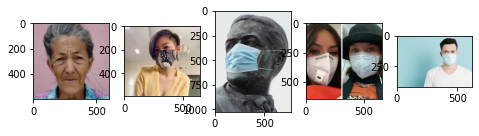

In [36]:
path='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/All' #전체 이미지가 들어있는 패스를 설정합니다.
#import cv2 # 이거 왜 임포트하죠? 티에서 쓰는게 없는거같은데? - 없어도 되네요?
import random # 값을 앤덤으로 생성하는 함수를 입포트합니다.
import matplotlib.pyplot as plt # matplotlib 라이브러리에 대해서  pyplot 패키지는 단순한 코드로 그래프를 생성할수 있음.
import matplotlib.image as mpimg # matplotlib 라이브러리에 대해서 image 패키지 이미지를 처리할수 있는 패키지

#plt.figure(figsize=(20,20)) 
cm = 1/2.54 # 센티미터 추가함.
plt.figure(figsize=(20*cm,20*cm)) # 20 센티미터로 하였음.

  # figure라는 그림단위, 이안에 한개 혹은 여러개의 plot을 관리하도록 함.
  # figure안에 들어가는 plot 하나를 subplot이라고 부릅니다.
  # 그림(figure)의 크기. (가로,세로) 인치 단위 20, 20
  # 의견 : 저그림이 해당범위내에서 보여줄수있는 최대비율의 사진인거같아요
 

for i in range(5): # 5개의 사진만 보여줄려고 한다.
    file=random.choice(os.listdir(path)) # 설정된 패스에서 1개 파일만 선택을 한다. 
    img_path=os.path.join(path,file) # 해당 파일이 있는 경로를 조인한다.
    image=mpimg.imread(img_path) # 해당 파일을 읽습니다.
    ax=plt.subplot(1,5,i+1) # figure 안에 5개의 subplot 중에 처음에는 0+1 해서 1번째꺼에 넣는다.
    plt.imshow(image) # 해당 이미지를 보여주게 됩니다.

In [37]:
# 데이터 증식 적용해봄
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


# 데이터 증식 수행 
train_data=ImageDataGenerator(rescale=1.0/255, 
                              zoom_range=0.2, # 20% 확대
                              shear_range=0.2, # 이것은 회전에서 보이지 않는 일종의 '늘이기'를 이미지에 만듭니다
                               rotation_range=40,  # 40도 회전
                              width_shift_range=0.2, # 0.2만큼 옆으로 shift
                              height_shift_range=0.2, # 0.1만큼 위로 shift
                              horizontal_flip=True) # 인풋을 무작위로 가로로 뒤집습니다.

train_generator = train_data.flow_from_directory(directory=traindir,target_size=(64,64),class_mode='binary',batch_size=32)

test_data=ImageDataGenerator(rescale=1.0/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True )

valid_generator = test_data.flow_from_directory(directory=validdir,target_size=(64,64),class_mode='binary',batch_size=32)
test_generator = test_data.flow_from_directory(directory=testdir,target_size=(64,64),class_mode='binary',batch_size=32,shuffle=False)

print(valid_generator.class_indices)


Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
{'WithMask': 0, 'WithoutMask': 1}


In [ ]:
from tensorflow.keras import layers, Sequential

Resnet = keras.applications.resnet.ResNet50(weights='imagenet',include_top=False,input_shape=(64,64,3))

for layer in Resnet.layers:
    layer.trainable = False
    
vmodel = Sequential()
vmodel.add(Resnet)
vmodel.add(layers.Flatten())
vmodel.add(layers.Dense(1,activation='sigmoid'))
vmodel.summary()

vmodel.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8193      
Total params: 23,595,905
Trainable params: 8,193
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
history = vmodel.fit(train_generator,steps_per_epoch=len(train_generator)//8,epochs=20,validation_data=valid_generator, batch_size=128)

Epoch 1/20
2/2 [==============================] - 115s 106s/step - loss: 0.7351 - accuracy: 0.5156 - val_loss: 0.6997 - val_accuracy: 0.4967
Epoch 2/20
2/2 [==============================] - 21s 15s/step - loss: 0.6927 - accuracy: 0.5469 - val_loss: 0.7035 - val_accuracy: 0.4739
Epoch 3/20
2/2 [==============================] - 18s 13s/step - loss: 0.6965 - accuracy: 0.5000 - val_loss: 0.7020 - val_accuracy: 0.4967
Epoch 4/20
2/2 [==============================] - 20s 14s/step - loss: 0.6825 - accuracy: 0.6094 - val_loss: 0.7014 - val_accuracy: 0.4804
Epoch 5/20
2/2 [==============================] - 17s 14s/step - loss: 0.6817 - accuracy: 0.5469 - val_loss: 0.7002 - val_accuracy: 0.4869
Epoch 6/20
2/2 [==============================] - 17s 13s/step - loss: 0.6850 - accuracy: 0.5000 - val_loss: 0.7062 - val_accuracy: 0.4150
Epoch 7/20
2/2 [==============================] - 15s 12s/step - loss: 0.6872 - accuracy: 0.5469 - val_loss: 0.7038 - val_accuracy: 0.4935
Epoch 8/20
2/2 [=========

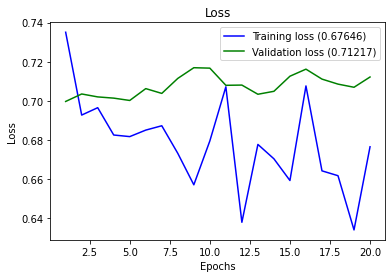

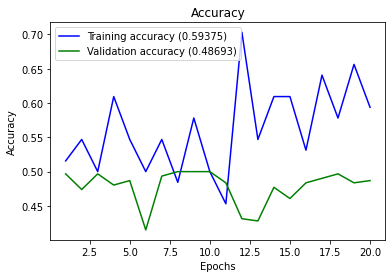

In [ ]:
def plot_history(history):  # 그림그리기
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]  #loss 랑 val값들이랑 분류작업 밑에도 똑같은 작용일듯
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:  # loss값이 없다면
        print('Loss is missing in history') # 잘못됬다는걸 보여주는거겠죠?
        return 
    
    epochs = range(1,len(history.history[loss_list[0]]) + 1) # epoch 횟수..
    
    ## Loss
    plt.figure(1) #도화지
    for l in loss_list: #순서대로 표기
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
plot_history(history)

In [ ]:
from tensorflow.keras import layers, Sequential

Resnet = keras.applications.resnet.ResNet101(weights='imagenet',include_top=False,input_shape=(64,64,3))

for layer in Resnet.layers:
    layer.trainable = False
    
vmodel = Sequential()
vmodel.add(Resnet)
vmodel.add(layers.Flatten())
vmodel.add(layers.Dense(1,activation='sigmoid'))
vmodel.summary()

vmodel.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')

171458560/171446536 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 2, 2, 2048)        42658176  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8193      
Total params: 42,666,369
Trainable params: 8,193
Non-trainable params: 42,658,176
_________________________________________________________________


In [ ]:
history = vmodel.fit(train_generator,steps_per_epoch=len(train_generator)//8,epochs=20,validation_data=valid_generator, batch_size=128)

Epoch 1/20
2/2 [==============================] - 23s 16s/step - loss: 0.7055 - accuracy: 0.5781 - val_loss: 0.7044 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 15s 14s/step - loss: 0.6945 - accuracy: 0.4821 - val_loss: 0.7253 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 15s 14s/step - loss: 0.7334 - accuracy: 0.4688 - val_loss: 0.7280 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 15s 14s/step - loss: 0.6946 - accuracy: 0.5469 - val_loss: 0.7081 - val_accuracy: 0.4935
Epoch 5/20
2/2 [==============================] - 15s 14s/step - loss: 0.6964 - accuracy: 0.4844 - val_loss: 0.7019 - val_accuracy: 0.4020
Epoch 6/20
2/2 [==============================] - 15s 14s/step - loss: 0.6857 - accuracy: 0.5781 - val_loss: 0.7018 - val_accuracy: 0.4575
Epoch 7/20
2/2 [==============================] - 15s 14s/step - loss: 0.6903 - accuracy: 0.5938 - val_loss: 0.7021 - val_accuracy: 0.4477
Epoch 8/20
2/2 [===========

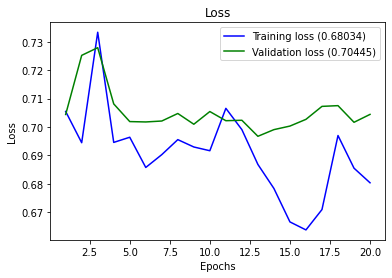

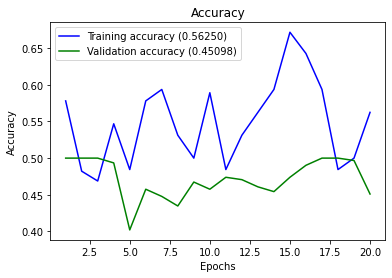

In [ ]:
def plot_history(history):  # 그림그리기
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]  #loss 랑 val값들이랑 분류작업 밑에도 똑같은 작용일듯
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:  # loss값이 없다면
        print('Loss is missing in history') # 잘못됬다는걸 보여주는거겠죠?
        return 
    
    epochs = range(1,len(history.history[loss_list[0]]) + 1) # epoch 횟수..
    
    ## Loss
    plt.figure(1) #도화지
    for l in loss_list: #순서대로 표기
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
plot_history(history)

In [46]:
from tensorflow.keras import layers, Sequential

Resnet = keras.applications.resnet.ResNet50(weights='imagenet',include_top=False,input_shape=(64,64,3))

for layer in Resnet.layers:
    layer.trainable = False
    
vmodel = Sequential()
vmodel.add(Resnet)
vmodel.add(layers.Flatten())
vmodel.add(layers.Dense(1,activation='sigmoid'))
vmodel.summary()

vmodel.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 8193      
Total params: 23,595,905
Trainable params: 8,193
Non-trainable params: 23,587,712
_________________________________________________________________


In [47]:
history = vmodel.fit(train_generator,steps_per_epoch=len(train_generator)//8,epochs=20,validation_data=valid_generator, batch_size=32)

Epoch 1/20
2/2 [==============================] - 16s 12s/step - loss: 0.6817 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.4967
Epoch 2/20
2/2 [==============================] - 11s 10s/step - loss: 0.6670 - accuracy: 0.6406 - val_loss: 0.7352 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 11s 10s/step - loss: 0.7014 - accuracy: 0.5625 - val_loss: 0.7269 - val_accuracy: 0.5033
Epoch 4/20
2/2 [==============================] - 11s 10s/step - loss: 0.7002 - accuracy: 0.5312 - val_loss: 0.7034 - val_accuracy: 0.5098
Epoch 5/20
2/2 [==============================] - 11s 10s/step - loss: 0.6816 - accuracy: 0.6250 - val_loss: 0.6930 - val_accuracy: 0.4967
Epoch 6/20
2/2 [==============================] - 12s 10s/step - loss: 0.6560 - accuracy: 0.7656 - val_loss: 0.6907 - val_accuracy: 0.5163
Epoch 7/20
2/2 [==============================] - 11s 10s/step - loss: 0.6847 - accuracy: 0.5312 - val_loss: 0.6889 - val_accuracy: 0.5294
Epoch 8/20
2/2 [===========

resnet 튜닝도해보고 resnet다른모델도 사용해봤는데  mask detection 하는데에 맞지 않는 모델인거 같습니다 . 제가 잘못한건지 정확도가 잘나오진않습니다.